In [1]:
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

In [2]:
warnings.simplefilter("ignore")

In [3]:
np.random.seed(1)

In [4]:
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import RandomUniform
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

2022-12-29 12:17:39.573061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
train1 = loadtxt('../../data/monks-1.train',
                         delimiter=' ', usecols=range(1, 8))
test1 = loadtxt('../../data/monks-1.test',
                        delimiter=' ', usecols=range(1, 8))

In [6]:
X_train1=train1[:, 1:7]
y_train1=train1[:, 0]

X_test1=test1[:, 1:7]
y_test1=test1[:, 0]

In [8]:
enc=OneHotEncoder()

In [9]:
X_train1=enc.fit_transform(X_train1).toarray()
X_test1=enc.fit_transform(X_test1).toarray()

In [10]:
def create_modelCV(lr=0.1, mom=0.1, act='relu'):
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, 
                    kernel_initializer=RandomUniform(minval=-0.1, maxval=0.1, seed=1), 
                    activation=act,
                    kernel_regularizer=l2(0.0001)
                   ))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer= SGD(lr=lr, momentum=mom, nesterov=False))
    return model

In [24]:
hyper_params_space = {
        'lr': [0.1, 0.2, 0.25, 0.3, 0.4, 0.5],
        'mom': [0.1, 0.2, 0.3, 0.5, 0.7, 0.85, 0.9],
        'act': ['sigmoid', 'relu']
    },



print('===================================')
# verbose is set to 0, no output will be printed to the console during training
model = KerasClassifier(build_fn=create_modelCV, batch_size=25, epochs=150, verbose=0)
mlpr = GridSearchCV( model
                    , hyper_params_space, scoring=['accuracy'], refit='accuracy', cv=3, n_jobs=2)
mlpr.fit(X_train1, y_train1)
print("DONE")
resultGSCV=pd.DataFrame(mlpr.cv_results_)


2022-12-29 12:47:05.030010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 12:47:05.030010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 12:47:17.755434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Epoch 1/10
Epoch 1/10
4/4 - 2s - loss: 0.2439 - accuracy: 0.5854 - 2s/epoch - 504ms/step
4/4 - 2s - loss: 0.2520 - accuracy: 0.5060 - 2s/epoch - 499ms/step
Epoch 2/10
Epoch 2/10
4/4 - 0s - loss: 0.2515 - accuracy: 0.5060 - 80ms/epoch - 20ms/step
4/4 - 0s - loss: 0.2431 - accuracy: 0.5854 - 79ms/epoch - 20ms/step
Epoch 3/10
Epoch 3/10
4/4 - 0s - loss: 0.2425 - accuracy: 0.5854 - 54ms/epoch - 14ms/step
4/4 - 0s - loss: 0.2502 - accuracy: 0.5060 - 56ms/epoch - 14ms/step
Epoch 4/10
Epoch 4/10
4/4 - 0s - loss: 0.2494 - accuracy: 0.5060 - 16ms/epoch - 4ms/step
4/4 - 0s - loss: 0.2416 - accuracy: 0.5854 - 19ms/epoch - 5ms/step
Epoch 5/10
Epoch 5/10
4/4 - 0s - loss: 0.2408 - accuracy: 0.5854 - 17ms/epoch - 4ms/step
4/4 - 0s - loss: 0.2492 - accuracy: 0.5060 - 17ms/epoch - 4ms/step
Epoch 6/10
Epoch 6/10
4/4 - 0s - loss: 0.2487 - accuracy: 0.5060 - 17ms/epoch - 4ms/step
Epoch 7/10
4/4 - 0s - loss: 0.2399 - accuracy: 0.5854 - 22ms/epoch - 6ms/step
Epoch 7/10
4/4 - 0s - loss: 0.2478 - accuracy: 0.

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Epoch 1/10
4/4 - 1s - loss: 0.3400 - accuracy: 0.4096 - 1s/epoch - 320ms/step
Epoch 2/10
4/4 - 0s - loss: 0.3244 - accuracy: 0.4096 - 21ms/epoch - 5ms/step
Epoch 3/10
4/4 - 0s - loss: 0.3103 - accuracy: 0.4096 - 47ms/epoch - 12ms/step
4/4 - 1s - loss: 0.2406 - accuracy: 0.5854 - 1s/epoch - 337ms/step
Epoch 2/10
Epoch 4/10
4/4 - 0s - loss: 0.2972 - accuracy: 0.4096 - 53ms/epoch - 13ms/step
Epoch 5/10
4/4 - 0s - loss: 0.2402 - accuracy: 0.5854 - 55ms/epoch - 14ms/step
Epoch 3/10
4/4 - 0s - loss: 0.2395 - accuracy: 0.5854 - 29ms/epoch - 7ms/step
Epoch 4/10
4/4 - 0s - loss: 0.2877 - accuracy: 0.4096 - 41ms/epoch - 10ms/step
Epoch 6/10
4/4 - 0s - loss: 0.2384 - accuracy: 0.5854 - 20ms/epoch - 5ms/step
Epoch 5/10
4/4 - 0s - loss: 0.2798 - accuracy: 0.4096 - 28ms/epoch - 7ms/step
Epoch 7/10
4/4 - 0s - loss: 0.2373 - accuracy: 0.5854 - 18ms/epoch - 4ms/step
Epoch 6/10
4/4 - 0s - loss: 0.2718 - accuracy: 0.4096 - 25ms/epoch - 6ms/step
4/4 - 0s - loss: 0.2369 - accuracy: 0.5854 - 22ms

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Epoch 1/10
4/4 - 2s - loss: 0.2536 - accuracy: 0.4940 - 2s/epoch - 401ms/step
Epoch 2/10
4/4 - 0s - loss: 0.2518 - accuracy: 0.4940 - 25ms/epoch - 6ms/step
Epoch 3/10
4/4 - 0s - loss: 0.2506 - accuracy: 0.4940 - 35ms/epoch - 9ms/step
Epoch 4/10
4/4 - 0s - loss: 0.2495 - accuracy: 0.4940 - 10ms/epoch - 2ms/step
Epoch 5/10
4/4 - 0s - loss: 0.2488 - accuracy: 0.4940 - 33ms/epoch - 8ms/step
Epoch 6/10
4/4 - 2s - loss: 0.2471 - accuracy: 0.5904 - 2s/epoch - 384ms/step
Epoch 2/10
4/4 - 0s - loss: 0.2476 - accuracy: 0.4940 - 37ms/epoch - 9ms/step
Epoch 7/10
4/4 - 0s - loss: 0.2460 - accuracy: 0.5904 - 35ms/epoch - 9ms/step
Epoch 3/10
4/4 - 0s - loss: 0.2462 - accuracy: 0.4940 - 29ms/epoch - 7ms/step
Epoch 8/10
4/4 - 0s - loss: 0.2452 - accuracy: 0.5904 - 39ms/epoch - 10ms/step
Epoch 4/10
4/4 - 0s - loss: 0.2456 - accuracy: 0.5060 - 37ms/epoch - 9ms/step
Epoch 9/10
4/4 - 0s - loss: 0.2451 - accuracy: 0.5181 - 54ms/epoch - 14ms/step
Epoch 10/10
4/4 - 0s - loss: 0.2436 - accuracy: 0.5

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 4ms/step


/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Epoch 1/10
4/4 - 2s - loss: 0.2948 - accuracy: 0.4146 - 2s/epoch - 393ms/step
Epoch 2/10
4/4 - 0s - loss: 0.2802 - accuracy: 0.4146 - 62ms/epoch - 15ms/step
Epoch 3/10
4/4 - 2s - loss: 0.2738 - accuracy: 0.5060 - 2s/epoch - 389ms/step
Epoch 2/10
4/4 - 0s - loss: 0.2665 - accuracy: 0.4146 - 26ms/epoch - 6ms/step
Epoch 4/10
4/4 - 0s - loss: 0.2670 - accuracy: 0.5060 - 16ms/epoch - 4ms/step
Epoch 3/10
4/4 - 0s - loss: 0.2578 - accuracy: 0.4146 - 13ms/epoch - 3ms/step
Epoch 5/10
4/4 - 0s - loss: 0.2621 - accuracy: 0.5060 - 22ms/epoch - 5ms/step
4/4 - 0s - loss: 0.2506 - accuracy: 0.4146 - 19ms/epoch - 5ms/step
Epoch 4/10
Epoch 6/10
4/4 - 0s - loss: 0.2583 - accuracy: 0.5060 - 21ms/epoch - 5ms/step
4/4 - 0s - loss: 0.2467 - accuracy: 0.4634 - 25ms/epoch - 6ms/step
Epoch 5/10
Epoch 7/10
4/4 - 0s - loss: 0.2436 - accuracy: 0.7805 - 19ms/epoch - 5ms/step
4/4 - 0s - loss: 0.2557 - accuracy: 0.5060 - 21ms/epoch - 5ms/step
Epoch 8/10
Epoch 6/10
4/4 - 0s - loss: 0.2405 - accuracy: 0.743

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Epoch 1/10
4/4 - 3s - loss: 0.2511 - accuracy: 0.5904 - 3s/epoch - 630ms/step
Epoch 2/10
4/4 - 3s - loss: 0.2738 - accuracy: 0.4146 - 3s/epoch - 645ms/step
4/4 - 0s - loss: 0.2495 - accuracy: 0.5904 - 65ms/epoch - 16ms/step
Epoch 2/10
Epoch 3/10
4/4 - 0s - loss: 0.2479 - accuracy: 0.5904 - 17ms/epoch - 4ms/step
4/4 - 0s - loss: 0.2636 - accuracy: 0.4146 - 18ms/epoch - 5ms/step
Epoch 3/10
Epoch 4/10
4/4 - 0s - loss: 0.2561 - accuracy: 0.4146 - 18ms/epoch - 5ms/step
4/4 - 0s - loss: 0.2465 - accuracy: 0.5904 - 23ms/epoch - 6ms/step
Epoch 5/10
Epoch 4/10
4/4 - 0s - loss: 0.2457 - accuracy: 0.5904 - 20ms/epoch - 5ms/step
4/4 - 0s - loss: 0.2504 - accuracy: 0.5366 - 23ms/epoch - 6ms/step
Epoch 6/10
Epoch 5/10
4/4 - 0s - loss: 0.2437 - accuracy: 0.5904 - 14ms/epoch - 3ms/step
Epoch 7/10
4/4 - 0s - loss: 0.2468 - accuracy: 0.5854 - 18ms/epoch - 4ms/step
Epoch 6/10
4/4 - 0s - loss: 0.2452 - accuracy: 0.5854 - 18ms/epoch - 5ms/step
4/4 - 0s - loss: 0.2432 - accuracy: 0.5904 - 29ms/ep

/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/Users/piyush/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Epoch 1/10


KeyboardInterrupt: 

In [12]:
mlpr.best_params_

{'act': 'relu', 'lr': 0.1, 'mom': 0.9}

In [13]:
from keras import initializers

In [14]:
def create_modelOP():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=17, activation=mlpr.best_params_['act'], kernel_initializer=RandomUniform(minval=-0.1, maxval=0.1, seed=1)
                    , kernel_regularizer=l2(0.0001)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', metrics=['accuracy'], 
                  optimizer= SGD(lr=mlpr.best_params_['lr'], momentum=mlpr.best_params_['mom']))
    return model

In [15]:
#instantiate the model and run it
#es = EarlyStopping(monitor='val_loss', patience=30)
#mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model1 = create_modelOP()

history1 = model1.fit(X_train1, y_train1, 
                      validation_data=(X_test1, y_test1), 
                      epochs=150, 
                      batch_size=25, 
                      #callbacks=[es,mc]
                     ).history

Epoch 1/150
5/5 [==============================] - 3s 385ms/step - loss: 0.2531 - accuracy: 0.4113 - val_loss: 0.2472 - val_accuracy: 0.5255
Epoch 2/150
5/5 [==============================] - 0s 71ms/step - loss: 0.2462 - accuracy: 0.5645 - val_loss: 0.2440 - val_accuracy: 0.6296
Epoch 3/150
5/5 [==============================] - 0s 40ms/step - loss: 0.2398 - accuracy: 0.6613 - val_loss: 0.2396 - val_accuracy: 0.5926
Epoch 4/150
5/5 [==============================] - 0s 40ms/step - loss: 0.2295 - accuracy: 0.6613 - val_loss: 0.2318 - val_accuracy: 0.6597
Epoch 5/150
5/5 [==============================] - 0s 56ms/step - loss: 0.2168 - accuracy: 0.7016 - val_loss: 0.2226 - val_accuracy: 0.6968
Epoch 6/150
5/5 [==============================] - 0s 40ms/step - loss: 0.2016 - accuracy: 0.7419 - val_loss: 0.2126 - val_accuracy: 0.7106
Epoch 7/150
5/5 [==============================] - 0s 61ms/step - loss: 0.1834 - accuracy: 0.7581 - val_loss: 0.2042 - val_accuracy: 0.7083
Epoch 8/150
5/5 [==

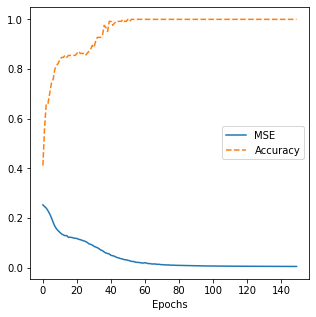

In [16]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['loss'], label='MSE')
plt.plot(history1['accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for training', fontsize = 18)
plt.xlabel('Epochs')
#plt.ylabel('MSE')
plt.legend()
plt.show()

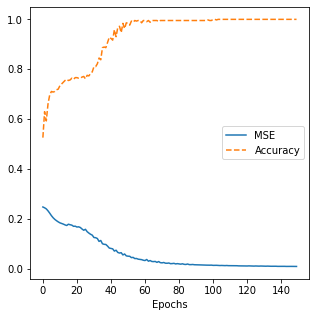

In [17]:
#See if we have overfitting
plt.figure(figsize=(5,5))
plt.plot(history1['val_loss'], label='MSE')
plt.plot(history1['val_accuracy'], label='Accuracy', linestyle='dashed')
#plt.plot(history1['val_loss'], label='Test')
#plt.title('Learning curves for test', fontsize = 18)
plt.xlabel('Epochs')
#plt.ylabel('MSE')
plt.legend()
plt.show()

In [18]:
mse, accuracy = model1.evaluate(X_test1, y_test1)

14/14 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 1.0000


In [19]:
print("Accuracy on Test", accuracy)
print("MSE on Test", mse)

Accuracy on Test 1.0
MSE on Test 0.008655073121190071


In [20]:
mse_tr, accuracy_tr = model1.evaluate(X_train1, y_train1)

4/4 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000


In [21]:
print("Accuracy on Training", accuracy_tr)
print("MSE on Training", mse_tr)

Accuracy on Training 1.0
MSE on Training 0.0051472666673362255
